# Exploring Keras Neural Network Sequential Model for Stock Prediction Fit 

## Long Short Term Memory Network  Method

In [1]:
#importing required libraries

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

C:\Users\razak\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#import packages

import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('sbux.csv')

#print the head
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2019-07-08,87.599998,87.949997,87.180000,87.440002,87.440002,6359500
1254,2019-07-09,87.290001,87.650002,86.889999,87.230003,87.230003,5355400
1255,2019-07-10,87.419998,88.540001,87.419998,88.379997,88.379997,5293000
1256,2019-07-11,88.660004,89.290001,88.269997,89.070000,89.070000,6191400
1257,2019-07-12,89.279999,89.820000,88.849998,89.769997,89.769997,5627500


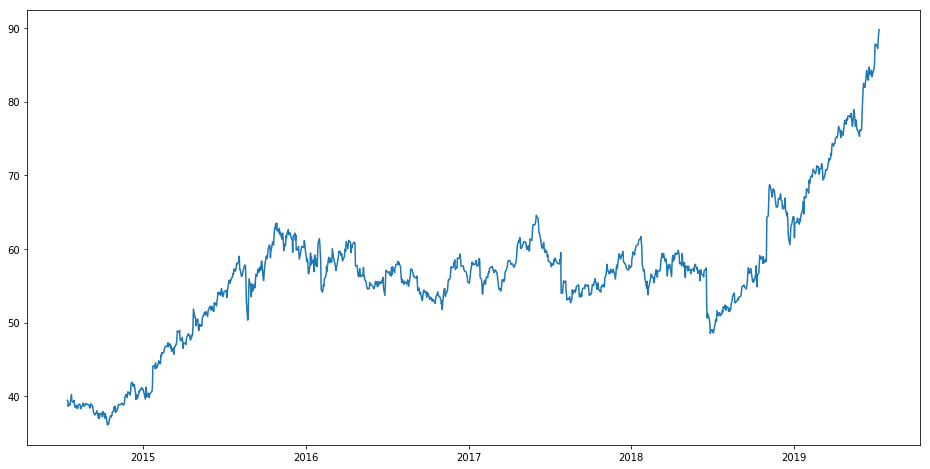

In [3]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plotting data for closing price (5 years)
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [4]:
#creating dataframe

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
new_data.head()

,Date,Close
0,2014-07-15 00:00:00,39.445
1,2014-07-16 00:00:00,39.365
2,2014-07-17 00:00:00,38.62
3,2014-07-18 00:00:00,38.97
4,2014-07-21 00:00:00,38.805


In [5]:


#setting index

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets

dataset = new_data.values

train = dataset[0:987,:]
test = dataset[987:,:]

new_data.shape, train.shape, test.shape

((1258, 1), (987, 1), (271, 1))

In [6]:
#converting dataset into x_train and y_train

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []
len(train)
len(test)

C:\Users\razak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


271

In [7]:
#Scaling data with MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

  

# x_train,y_train


C:\Users\razak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
# create the LSTM network

model = Sequential()
model.add(LSTM(units=50, 
               return_sequences=True, 
               input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# compiling the model

model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Use tf.cast instead.


In [10]:
# Fitting the model

model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
model.summary()

Instructions for updating:
Use tf.cast instead.
 - 52s - loss: 0.0016
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [11]:

#predicting using past 60 from the train data

inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

closing_price = model.predict(X_test)

closing_price = scaler.inverse_transform(closing_price)




In [12]:
import math
import matplotlib
import numpy as np
rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
rms



5.3240292275808745

In [13]:
#prep for plotting
train = new_data[:987]
test = new_data[987:]


In [14]:
#prep for plotting

train = new_data[:987]
test = new_data[987:]
test['Predictions'] = closing_price


C:\Users\razak\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


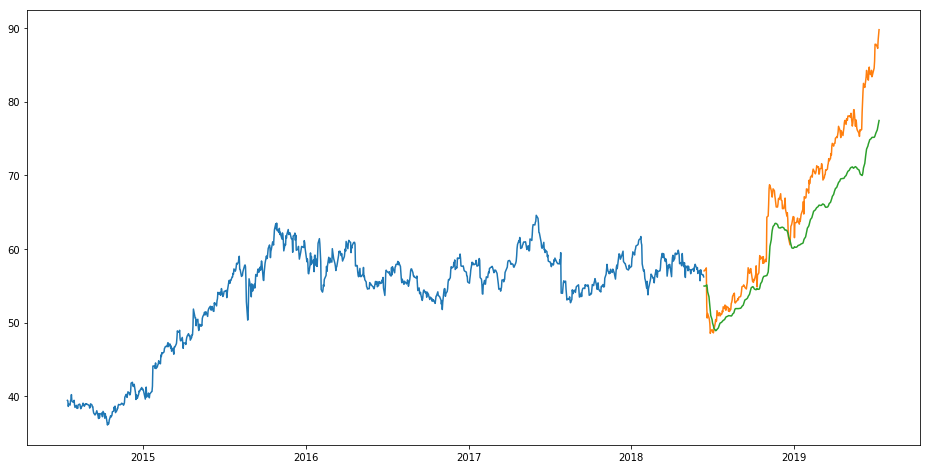

In [15]:
#for plotting


plt.figure(figsize=(16,8))
plt.plot(train['Close'])

plt.plot(test[['Close','Predictions']])



In [16]:
# Save the model
model.save("stock_prediction_train.v1")

# Load the model
from tensorflow.keras.models import load_model
model = load_model("stock_prediction_train.v1")